<a href="https://colab.research.google.com/github/mabushii68/AI_Class/blob/main/kc_house_data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [33]:
df = df.drop(columns=['date'])

In [34]:
# 컬렴명 확인
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [35]:
# 레이블 갯수 확인 (숫자)
df['price'].value_counts()

,count
price,
450000.0,172
350000.0,172
550000.0,159
500000.0,152
425000.0,150
...,...
280400.0,1
118000.0,1
202200.0,1


In [36]:
# 결측치 확인
df.isnull().sum()

,0
id,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [37]:
X=df.drop('price',axis=1)
X.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [38]:
y=df['price']
y.value_counts()

,count
price,
450000.0,172
350000.0,172
550000.0,159
500000.0,152
425000.0,150
...,...
280400.0,1
118000.0,1
202200.0,1


In [39]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [40]:
Y = df['price'].values.astype('float32')

In [41]:
print(y.shape)

(21613,)


In [42]:
X

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))

# 예측 후 역변환 필요
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()
model.add(Dense(128, input_shape=(19,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # 회귀: 1개의 연속값

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.8710e-04 - mae: 0.0195 - val_loss: 6.3072e-04 - val_mae: 0.0155
Epoch 2/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.9091e-04 - mae: 0.0149 - val_loss: 3.9186e-04 - val_mae: 0.0116
Epoch 3/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.2866e-04 - mae: 0.0131 - val_loss: 3.5750e-04 - val_mae: 0.0115
Epoch 4/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1616e-04 - mae: 0.0128 - val_loss: 4.2547e-04 - val_mae: 0.0141
Epoch 5/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.0364e-04 - mae: 0.0129 - val_loss: 3.5154e-04 - val_mae: 0.0115
Epoch 6/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.4779e-04 - mae: 0.0118 - val_loss: 3.4259e-04 - val_mae: 0.0107
Epoch 7/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.5386e-04 - mae: 0.0118 - val_loss: 3.3644e-04 - val_mae: 0.0119
Epoch 8/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.3034e-04 - mae: 0.0114 - val_loss: 3.3223e-04 - val_mae:

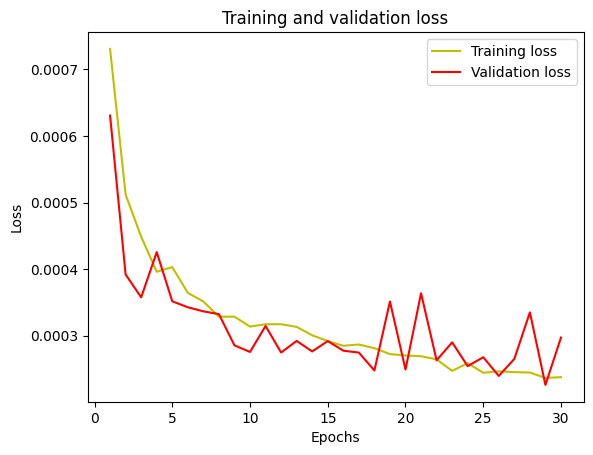

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


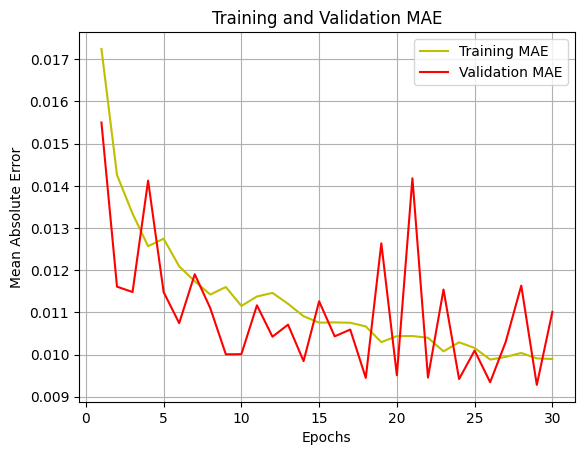

In [49]:
mae = model_history.history['mae']
val_mae = model_history.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'y', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# y_pred가 (샘플 수, 1)일 경우 평탄화
if len(y_pred.shape) == 2:
    y_pred = y_pred.flatten()

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)

# MSE → RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# R² (설명력)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print("## 회귀 모델 평가 지표 ##")
print(f"MAE  (평균 절대 오차): {mae:,.2f}")
print(f"RMSE (평균 제곱근 오차): {rmse:,.2f}")
print(f"R²    (결정 계수): {r2:.4f}")

## 회귀 모델 평가 지표 ##
MAE  (평균 절대 오차): 0.01
RMSE (평균 제곱근 오차): 0.02
R²    (결정 계수): 0.8548
